# Sunbird RC API - Water Facility Demo

This notebook demonstrates how to interact with Sunbird RC Registry API for Water Facilities.

## Prerequisites
- Sunbird RC services running (use `./start-sunbird.sh`)
- Registry API available at http://localhost:8081
- WaterFacility schema configured

## Setup

In [1]:
import requests
import json
import pandas as pd
from datetime import datetime
from IPython.display import display, Markdown, JSON

# Configuration
BASE_URL = "http://localhost:8081/api/v1"
HEADERS = {"Content-Type": "application/json"}

print("✅ Setup complete!")
print(f"Registry API: {BASE_URL}")

✅ Setup complete!
Registry API: http://localhost:8081/api/v1


## 1. Check Registry Health

In [2]:
response = requests.get("http://localhost:8081/health")
health = response.json()

print(f"Status: {health['result']['healthy']}")
print(f"Service: {health['result']['name']}")
display(JSON(health, expanded=True))

Status: True
Service: sunbirdrc-registry-api


<IPython.core.display.JSON object>

## 2. List All Water Facilities

In [3]:
response = requests.get(f"{BASE_URL}/WaterFacility", headers=HEADERS)
data = response.json()

print(f"Total Water Facilities: {data['totalCount']}\n")

if data['totalCount'] > 0:
    df = pd.DataFrame(data['data'])
    # Select key columns
    columns = ['wfName', 'wfId', 'typeOfWaterFacility', 'institution', 'address', 'foundingDate', 'waterCapacity', 'osid']
    display(df[columns])
else:
    print("No water facilities found")

Total Water Facilities: 0

No water facilities found


## 3. Create a New Water Facility

In [4]:
new_facility = {
    "wfName": "Metropolitan Water Treatment Plant",
    "wfId": "WF2024001",
    "typeOfWaterFacility": "Water Treatment Plant",
    "address": "123 River Road, Metro City, MC 12345",
    "institution": "City Water Authority",
    "foundingDate": "2020-06-15",
    "waterCapacity": 50000,
    "certificateNumber": "CERT-WF-2024-001"
}

response = requests.post(
    f"{BASE_URL}/WaterFacility",
    headers=HEADERS,
    json=new_facility
)

if response.status_code == 200:
    result = response.json()
    print("✅ Water Facility created successfully!")
    print(f"ID: {result['result']['WaterFacility']['osid']}")
    display(JSON(result, expanded=True))
else:
    print(f"❌ Error: {response.status_code}")
    print(response.text)

✅ Water Facility created successfully!
ID: 1-7bda31cf-7d65-4a19-9bf6-f92b1cc4f9de


<IPython.core.display.JSON object>

## 4. Get a Specific Water Facility by ID

In [5]:
# Get the first facility's ID
response = requests.get(f"{BASE_URL}/WaterFacility")
facilities = response.json()['data']

if facilities:
    facility_id = facilities[0]['osid']
    print(f"Fetching water facility: {facility_id}\n")
    response = requests.get(f"{BASE_URL}/WaterFacility/{facility_id}")
    facility = response.json()
    display(JSON(facility, expanded=True))
else:
    print("No facilities found")

Fetching water facility: 1-7bda31cf-7d65-4a19-9bf6-f92b1cc4f9de



<IPython.core.display.JSON object>

## 5. Update a Water Facility

In [6]:
# Get first facility
response = requests.get(f"{BASE_URL}/WaterFacility")
facilities = response.json()['data']

if facilities:
    facility_id = facilities[0]['osid']
    
    # Update the facility
    update_data = facilities[0].copy()
    update_data['waterCapacity'] = 75000  # Update capacity
    update_data['address'] = '456 New River Road, Metro City, MC 12345'  # Update address
    
    response = requests.put(
        f"{BASE_URL}/WaterFacility/{facility_id}",
        headers=HEADERS,
        json=update_data
    )
    
    if response.status_code == 200:
        print("✅ Water Facility updated successfully!")
        display(JSON(response.json(), expanded=True))
    else:
        print(f"❌ Error: {response.status_code}")
        print(response.text)
else:
    print("No facilities available to update")

✅ Water Facility updated successfully!


<IPython.core.display.JSON object>

## 6. Search Water Facilities

In [7]:
search_query = {
    "filters": {
        "typeOfWaterFacility": {"eq": "Water Treatment Plant"}
    }
}

response = requests.post(
    f"{BASE_URL}/WaterFacility/search",
    headers=HEADERS,
    json=search_query
)

if response.status_code == 200:
    results = response.json()
    print(f"Found {results['totalCount']} Water Treatment Plants\n")
    
    if results['totalCount'] > 0:
        df = pd.DataFrame(results['data'])
        display(df[['wfName', 'typeOfWaterFacility', 'institution', 'waterCapacity', 'address']])
    else:
        print("No results found")
else:
    print(f"❌ Error: {response.status_code}")
    print(response.text)

Found 1 Water Treatment Plants



,wfName,typeOfWaterFacility,institution,waterCapacity,address
0,Metropolitan Water Treatment Plant,Water Treatment Plant,City Water Authority,75000,"456 New River Road, Metro City, MC 12345"


## 7. Statistics & Visualization

/home/dedenbangkit/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


📊 Water Facility Statistics

Total Facilities: 1
Average Capacity: 75,000 cubic meters
Total Capacity: 75,000 cubic meters

Facility Type Distribution:
typeOfWaterFacility
Water Treatment Plant    1
Name: count, dtype: int64

Institutions:
institution
City Water Authority    1
Name: count, dtype: int64


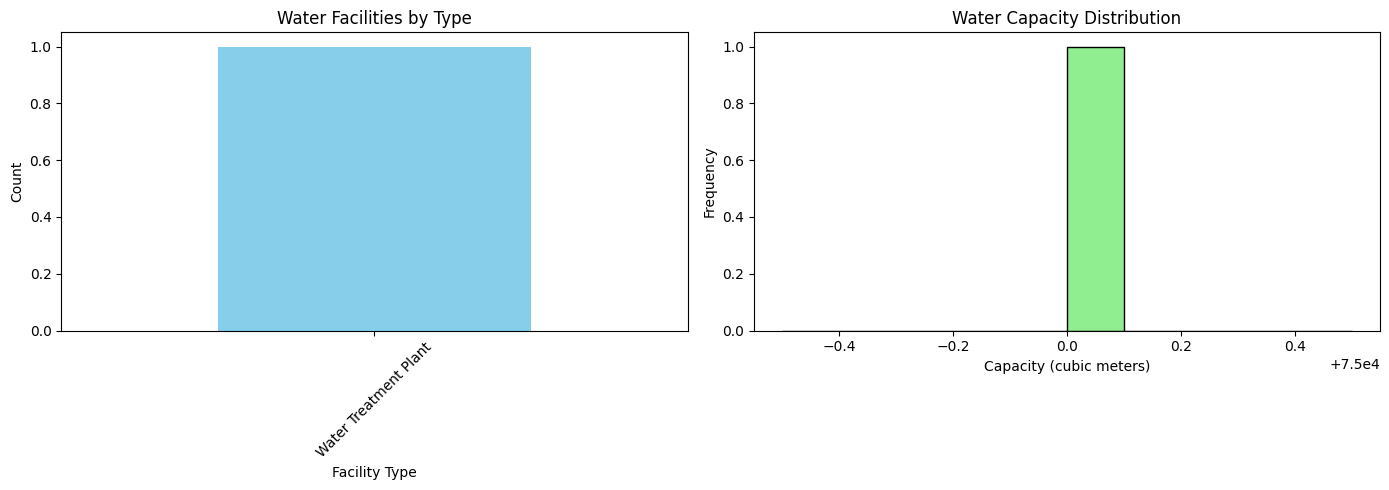

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

response = requests.get(f"{BASE_URL}/WaterFacility")
data = response.json()

if data['totalCount'] > 0:
    df = pd.DataFrame(data['data'])
    
    # Statistics
    print("📊 Water Facility Statistics\n")
    print(f"Total Facilities: {len(df)}")
    if 'waterCapacity' in df.columns:
        print(f"Average Capacity: {df['waterCapacity'].mean():,.0f} cubic meters")
        print(f"Total Capacity: {df['waterCapacity'].sum():,.0f} cubic meters")
    print(f"\nFacility Type Distribution:")
    print(df['typeOfWaterFacility'].value_counts())
    print(f"\nInstitutions:")
    print(df['institution'].value_counts())
    
    # Visualizations
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Facility type distribution
    df['typeOfWaterFacility'].value_counts().plot(kind='bar', ax=axes[0], color='skyblue')
    axes[0].set_title('Water Facilities by Type')
    axes[0].set_xlabel('Facility Type')
    axes[0].set_ylabel('Count')
    axes[0].tick_params(axis='x', rotation=45)
    
    # Capacity distribution
    if 'waterCapacity' in df.columns:
        df['waterCapacity'].plot(kind='hist', bins=10, ax=axes[1], color='lightgreen', edgecolor='black')
        axes[1].set_title('Water Capacity Distribution')
        axes[1].set_xlabel('Capacity (cubic meters)')
        axes[1].set_ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()
else:
    print("No data available for visualization")

## 8. Bulk Create Water Facilities

In [9]:
# Sample bulk data
bulk_facilities = [
    {
        "wfName": "Central Reservoir",
        "wfId": "WF2024002",
        "typeOfWaterFacility": "Reservoir",
        "address": "789 Lake View Drive, Metro City, MC 12346",
        "institution": "City Water Authority",
        "foundingDate": "2018-03-20",
        "waterCapacity": 150000,
        "certificateNumber": "CERT-WF-2024-002"
    },
    {
        "wfName": "North District Pumping Station",
        "wfId": "WF2024003",
        "typeOfWaterFacility": "Pumping Station",
        "address": "101 Industrial Boulevard, North District, MC 12347",
        "institution": "Regional Water Board",
        "foundingDate": "2019-11-15",
        "waterCapacity": 30000,
        "certificateNumber": "CERT-WF-2024-003"
    },
    {
        "wfName": "Southern Distribution Center",
        "wfId": "WF2024004",
        "typeOfWaterFacility": "Distribution Center",
        "address": "555 South Main Street, South Metro, MC 12348",
        "institution": "City Water Authority",
        "foundingDate": "2021-08-10",
        "waterCapacity": 40000,
        "certificateNumber": "CERT-WF-2024-004"
    },
    {
        "wfName": "Coastal Desalination Plant",
        "wfId": "WF2024005",
        "typeOfWaterFacility": "Desalination Plant",
        "address": "2000 Ocean Drive, Coastal District, MC 12349",
        "institution": "State Water Commission",
        "foundingDate": "2022-05-01",
        "waterCapacity": 100000,
        "certificateNumber": "CERT-WF-2024-005"
    },
    {
        "wfName": "East Side Water Treatment Plant",
        "wfId": "WF2024006",
        "typeOfWaterFacility": "Water Treatment Plant",
        "address": "3456 Eastern Highway, East Metro, MC 12350",
        "institution": "Regional Water Board",
        "foundingDate": "2017-12-05",
        "waterCapacity": 80000,
        "certificateNumber": "CERT-WF-2024-006"
    }
]

print(f"Creating {len(bulk_facilities)} water facilities...\n")

results = []
for i, facility in enumerate(bulk_facilities, 1):
    response = requests.post(
        f"{BASE_URL}/WaterFacility",
        headers=HEADERS,
        json=facility
    )
    
    if response.status_code == 200:
        result = response.json()
        osid = result['result']['WaterFacility']['osid']
        print(f"✅ {i}. Created: {facility['wfName']} (ID: {osid})")
        results.append({'status': 'success', 'osid': osid, 'name': facility['wfName']})
    else:
        print(f"❌ {i}. Failed: {facility['wfName']} - {response.status_code}")
        results.append({'status': 'failed', 'name': facility['wfName'], 'error': response.text})

print(f"\n✅ Created {len([r for r in results if r['status'] == 'success'])} facilities")
print(f"❌ Failed {len([r for r in results if r['status'] == 'failed'])} facilities")

Creating 5 water facilities...

✅ 1. Created: Central Reservoir (ID: 1-4f35cf77-ab91-4980-932a-a9d6dd0552d2)
✅ 2. Created: North District Pumping Station (ID: 1-37e38740-8dbc-4f68-83d9-345318e43746)
✅ 3. Created: Southern Distribution Center (ID: 1-736b4078-61f2-4e5b-86f9-ce36063dff7d)
✅ 4. Created: Coastal Desalination Plant (ID: 1-f2d72bf6-7fbe-4a88-95c1-a7ccef24afc8)
✅ 5. Created: East Side Water Treatment Plant (ID: 1-93a95b1f-ae14-45ea-9edf-ac40119bc34f)

✅ Created 5 facilities
❌ Failed 0 facilities


## 9. Advanced Analytics - Capacity by Type

📊 Capacity Analysis by Facility Type



,Total Capacity,Average Capacity,Count
typeOfWaterFacility,,,
Desalination Plant,100000,100000.0,1
Distribution Center,40000,40000.0,1
Pumping Station,30000,30000.0,1
Reservoir,150000,150000.0,1
Water Treatment Plant,155000,77500.0,2


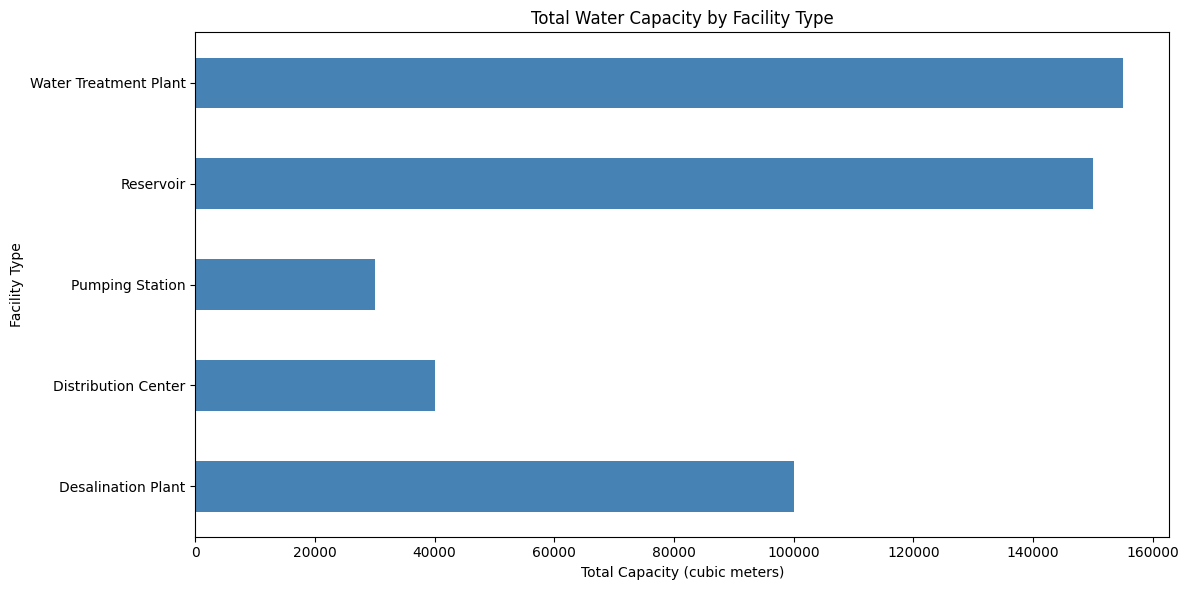

In [10]:
response = requests.get(f"{BASE_URL}/WaterFacility")
data = response.json()

if data['totalCount'] > 0:
    df = pd.DataFrame(data['data'])
    
    if 'waterCapacity' in df.columns and 'typeOfWaterFacility' in df.columns:
        # Group by facility type
        capacity_by_type = df.groupby('typeOfWaterFacility')['waterCapacity'].agg(['sum', 'mean', 'count'])
        capacity_by_type.columns = ['Total Capacity', 'Average Capacity', 'Count']
        
        print("📊 Capacity Analysis by Facility Type\n")
        display(capacity_by_type)
        
        # Visualization
        fig, ax = plt.subplots(figsize=(12, 6))
        capacity_by_type['Total Capacity'].plot(kind='barh', ax=ax, color='steelblue')
        ax.set_title('Total Water Capacity by Facility Type')
        ax.set_xlabel('Total Capacity (cubic meters)')
        ax.set_ylabel('Facility Type')
        plt.tight_layout()
        plt.show()
    else:
        print("Capacity data not available")
else:
    print("No data available")

## 10. Delete a Water Facility

In [11]:
# WARNING: This will delete a water facility!
# Uncomment to use

# facility_id_to_delete = "YOUR-FACILITY-ID-HERE"
# response = requests.delete(f"{BASE_URL}/WaterFacility/{facility_id_to_delete}")

# if response.status_code == 200:
#     print(f"✅ Water Facility {facility_id_to_delete} deleted successfully")
# else:
#     print(f"❌ Error: {response.status_code}")
#     print(response.text)

print("⚠️  Delete function is commented out for safety")
print("Uncomment the code above to enable deletion")

⚠️  Delete function is commented out for safety
Uncomment the code above to enable deletion


## 11. Export to CSV

In [12]:
response = requests.get(f"{BASE_URL}/WaterFacility")
data = response.json()

if data['totalCount'] > 0:
    df = pd.DataFrame(data['data'])
    
    # Select columns to export
    export_columns = [
        'wfName', 'wfId', 'typeOfWaterFacility', 'institution',
        'address', 'foundingDate', 'waterCapacity', 
        'certificateNumber', 'osid', 'osCreatedAt'
    ]
    
    # Only include columns that exist in the dataframe
    available_columns = [col for col in export_columns if col in df.columns]
    
    filename = f'water_facilities_{datetime.now().strftime("%Y%m%d_%H%M%S")}.csv'
    df[available_columns].to_csv(filename, index=False)
    
    print(f"✅ Exported {len(df)} water facilities to: {filename}")
    display(df[available_columns].head())
else:
    print("No water facilities to export")

✅ Exported 6 water facilities to: water_facilities_20251215_135051.csv


,wfName,wfId,typeOfWaterFacility,institution,address,foundingDate,waterCapacity,certificateNumber,osid,osCreatedAt
0,Central Reservoir,WF2024002,Reservoir,City Water Authority,"789 Lake View Drive, Metro City, MC 12346",2018-03-20,150000,CERT-WF-2024-002,1-4f35cf77-ab91-4980-932a-a9d6dd0552d2,2025-12-15T06:50:14.022Z
1,Coastal Desalination Plant,WF2024005,Desalination Plant,State Water Commission,"2000 Ocean Drive, Coastal District, MC 12349",2022-05-01,100000,CERT-WF-2024-005,1-f2d72bf6-7fbe-4a88-95c1-a7ccef24afc8,2025-12-15T06:50:15.125Z
2,Southern Distribution Center,WF2024004,Distribution Center,City Water Authority,"555 South Main Street, South Metro, MC 12348",2021-08-10,40000,CERT-WF-2024-004,1-736b4078-61f2-4e5b-86f9-ce36063dff7d,2025-12-15T06:50:14.683Z
3,North District Pumping Station,WF2024003,Pumping Station,Regional Water Board,"101 Industrial Boulevard, North District, MC 1...",2019-11-15,30000,CERT-WF-2024-003,1-37e38740-8dbc-4f68-83d9-345318e43746,2025-12-15T06:50:14.572Z
4,Metropolitan Water Treatment Plant,WF2024001,Water Treatment Plant,City Water Authority,"456 New River Road, Metro City, MC 12345",2020-06-15,75000,CERT-WF-2024-001,1-7bda31cf-7d65-4a19-9bf6-f92b1cc4f9de,2025-12-15T06:49:46.736Z


## 12. Facility Timeline Visualization

📅 Water Facilities Timeline

2017-12-05 - East Side Water Treatment Plant (Water Treatment Plant)
2018-03-20 - Central Reservoir (Reservoir)
2019-11-15 - North District Pumping Station (Pumping Station)
2020-06-15 - Metropolitan Water Treatment Plant (Water Treatment Plant)
2021-08-10 - Southern Distribution Center (Distribution Center)
2022-05-01 - Coastal Desalination Plant (Desalination Plant)


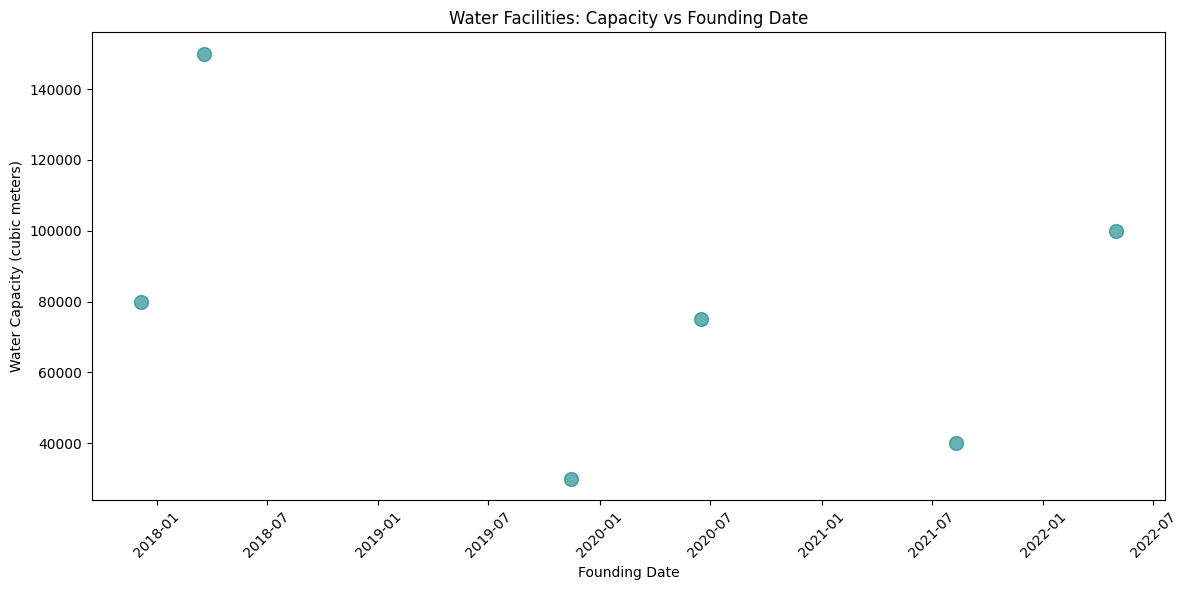

In [13]:
response = requests.get(f"{BASE_URL}/WaterFacility")
data = response.json()

if data['totalCount'] > 0:
    df = pd.DataFrame(data['data'])
    
    if 'foundingDate' in df.columns:
        # Convert to datetime
        df['foundingDate'] = pd.to_datetime(df['foundingDate'])
        df_sorted = df.sort_values('foundingDate')
        
        print("📅 Water Facilities Timeline\n")
        for idx, row in df_sorted.iterrows():
            print(f"{row['foundingDate'].strftime('%Y-%m-%d')} - {row['wfName']} ({row['typeOfWaterFacility']})")
        
        # Visualization
        fig, ax = plt.subplots(figsize=(12, 6))
        df_sorted.plot(x='foundingDate', y='waterCapacity', kind='scatter', 
                      s=100, alpha=0.6, ax=ax, color='teal')
        ax.set_title('Water Facilities: Capacity vs Founding Date')
        ax.set_xlabel('Founding Date')
        ax.set_ylabel('Water Capacity (cubic meters)')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    else:
        print("Founding date data not available")
else:
    print("No data available")

## Summary

This notebook demonstrated:
- ✅ Checking registry health
- ✅ Listing all water facilities
- ✅ Creating new water facilities
- ✅ Reading specific facilities
- ✅ Updating facilities
- ✅ Searching facilities by type
- ✅ Visualizing capacity data
- ✅ Bulk operations
- ✅ Advanced analytics
- ✅ Timeline visualization
- ✅ Exporting to CSV

### Water Facility Types Supported
- Water Treatment Plant
- Reservoir
- Pumping Station
- Distribution Center
- Desalination Plant

### Next Steps
- Add geolocation mapping for facilities
- Implement water quality tracking
- Create maintenance scheduling
- Add capacity forecasting
- Integrate with IoT sensors

For more information, see the WaterFacility schema at `java/registry/src/main/resources/public/_schemas/WaterFacility.json`